# Tugas 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/ppw/report/tugas-ppw/data_berita_detik.csv")
df.head()

,judul,tanggal,isi,kategori
0,"Waspadai 7 Tanda Tubuh Kekurangan Vitamin B12,...","Rabu, 02 Okt 2024 20:08 WIB",Jakarta - Vitamin B12 adalah nutrisi penting y...,Kesehatan
1,Bentuk Tubuh Seperti Ini Disebut Lebih Berisik...,"Rabu, 02 Okt 2024 19:00 WIB",Jakarta - Sudah sejak lama peneliti mengukur r...,Kesehatan
2,Apa yang Terjadi Jika Kadar Gula Darah Tinggi?...,"Rabu, 02 Okt 2024 18:00 WIB",Jakarta - Gula darah yang tinggi atau hipergli...,Kesehatan
3,"Wajib Perhatikan, Ini Tanda Pekerja Stres dan ...","Rabu, 02 Okt 2024 16:31 WIB",Jakarta - Setiap pekerjaan pasti memiliki beba...,Kesehatan
4,"Menyoal Sindrom Kematian Mendadak, Ini Penyeba...","Rabu, 02 Okt 2024 16:03 WIB",Jakarta - Sindrom kematian mendadak adalah ist...,Kesehatan


In [ ]:
# mengambil satu sample berita
sample_berita = df['isi'].iloc[1]
print(sample_berita)


Jakarta - Sudah sejak lama peneliti mengukur risiko penyakit kronis berdasarkan indeks massa tubuh atau body mass index (BMI). Namun sebuah studi baru di China mengungkap bahwa indeks kebulatan tubuh atau body roundness index (BRI) menjadi indikator yang lebih baik dalam kaitannya dengan risiko penyakit kronis. body mass index (BMI) adalah cara menghitung berat badan ideal berdasarkan tinggi dan berat badan. Sementara body roundness index (BRI) adalah cara menghitung berat badan ideal mengukur tinggi badan, berat badan, lingkar pinggang, dan terkadang lingkar pinggul. Penelitian tersebut meneliti 10 ribu orang dewasa di china berusia 45 tahun atau lebih. Mereka menggunakan data dari China Health and Retirement Longitudinal study, yakni orang dewasa China mengukur pinggang mereka setiap dua tahun sekali, dari 2011 hingga 2020. Peneliti kemudian menganalisis lintasan pengukuran BRI dari waktu ke waktu, serta menempatkan peserta ke dalam tiga kelompok. Di antaranya BRI rendah, sedang, dan

memisahkan per kalimat


---



In [ ]:
# Membuat list untuk menyimpan hasil
result_list = []

# Pisahkan kalimat berdasarkan titik
sentences = sample_berita.split('.')  # Pisahkan kalimat berdasarkan titik
sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong

# Looping untuk menambahkan setiap kalimat ke result_list
for i, sentence in enumerate(sentences, 1):
    result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df


,kalimat ke n,kalimat
0,Kalimat ke 1,Jakarta - Sudah sejak lama peneliti mengukur r...
1,Kalimat ke 2,Namun sebuah studi baru di China mengungkap ba...
2,Kalimat ke 3,body mass index (BMI) adalah cara menghitung b...
3,Kalimat ke 4,Sementara body roundness index (BRI) adalah ca...
4,Kalimat ke 5,Penelitian tersebut meneliti 10 ribu orang dew...
5,Kalimat ke 6,Mereka menggunakan data dari China Health and ...
6,Kalimat ke 7,Peneliti kemudian menganalisis lintasan penguk...
7,Kalimat ke 8,"Di antaranya BRI rendah, sedang, dan tinggi"
8,Kalimat ke 9,Adapun rumus menghitung BRI adalah Lingkar Pin...
9,Kalimat ke 10,Nilai BRI lebih tinggi menunjukkan proporsi tu...


pre processing


---



In [ ]:
!pip install Sastrawi

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import sent_tokenize
import networkx as nx
import matplotlib.pyplot as plt


# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,kalimat ke n,final
0,Kalimat ke 1,jakarta teliti ukur risiko sakit kronis dasar ...
1,Kalimat ke 2,studi china ungkap indeks bulat tubuh body rou...
2,Kalimat ke 3,body mass index bmi hitung berat badan ideal d...
3,Kalimat ke 4,body roundness index bri hitung berat badan id...
4,Kalimat ke 5,teliti teliti ribu orang dewasa china usia
5,Kalimat ke 6,data china health and retirement longitudinal ...
6,Kalimat ke 7,teliti analis lintas ukur bri tempat serta kel...
7,Kalimat ke 8,bri rendah
8,Kalimat ke 9,rumus hitung bri lingkar pinggang cmtinggi bad...
9,Kalimat ke 10,nilai bri proporsi tubuh bulat


TF-IDF


---



In [ ]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,adang,akurat,analis,and,andal,area,asal,badan,banding,...,tubuh,tulis,tumpu,ukur,ungkap,universitas,usia,variasi,wuxi,yun
0,Kalimat ke 1,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.245090,0.000000,0.000000,0.218722,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kalimat ke 2,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.233093,0.000000,0.000000,0.000000,0.32886,0.000000,0.000000,0.000000,0.000000,0.000000
2,Kalimat ke 3,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492122,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kalimat ke 4,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551003,0.000000,...,0.000000,0.000000,0.000000,0.153445,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kalimat ke 5,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.421803,0.000000,0.000000,0.000000
5,Kalimat ke 6,0.0000,0.000000,0.000000,0.318544,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.201490,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Kalimat ke 7,0.0000,0.000000,0.444487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.281153,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Kalimat ke 8,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kalimat ke 9,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319854,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Kalimat ke 10,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.389431,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 22,Kalimat ke 23,Kalimat ke 24,Kalimat ke 25,Kalimat ke 26,Kalimat ke 27,Kalimat ke 28,Kalimat ke 29,Kalimat ke 30,Kalimat ke 31
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.420104,0.352843,0.129731,0.090104,0.044070,0.103867,0.000000,0.000000,0.095446,...,0.228749,0.138882,0.041380,0.207188,0.028891,0.055578,0.078304,0.000000,0.000000,0.0
Kalimat ke 2,0.420104,1.000000,0.122531,0.172329,0.078079,0.105256,0.031730,0.080300,0.030158,0.273929,...,0.185063,0.073527,0.000000,0.095011,0.239510,0.000000,0.048264,0.000000,0.000000,0.0
Kalimat ke 3,0.352843,0.122531,1.000000,0.679668,0.000000,0.000000,0.000000,0.000000,0.236111,0.000000,...,0.044981,0.140779,0.279871,0.046977,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 4,0.129731,0.172329,0.679668,1.000000,0.000000,0.075214,0.066548,0.059235,0.452550,0.028932,...,0.051791,0.061887,0.221466,0.221117,0.017332,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 5,0.090104,0.078079,0.000000,0.000000,1.000000,0.313187,0.115823,0.000000,0.000000,0.000000,...,0.090139,0.000000,0.071014,0.094140,0.245448,0.151920,0.075324,0.000000,0.358790,0.0
Kalimat ke 6,0.044070,0.105256,0.000000,0.075214,0.313187,1.000000,0.056650,0.000000,0.077141,0.000000,...,0.044088,0.000000,0.047865,0.112013,0.218111,0.000000,0.000000,0.117437,0.097467,0.0
Kalimat ke 7,0.103867,0.031730,0.000000,0.066548,0.115823,0.056650,1.000000,0.108534,0.040761,0.053012,...,0.137284,0.000000,0.000000,0.143377,0.031756,0.071442,0.099971,0.103346,0.063523,0.0
Kalimat ke 8,0.000000,0.080300,0.000000,0.059235,0.000000,0.000000,0.108534,1.000000,0.103156,0.134159,...,0.084467,0.000000,0.000000,0.088216,0.080366,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 9,0.000000,0.030158,0.236111,0.452550,0.000000,0.077141,0.040761,0.103156,1.000000,0.050385,...,0.031723,0.107774,0.072432,0.222313,0.030182,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# Tetapkan ambang batas (threshold) 0.5
threshold = 0.5

# Buat matriks adjacency: jika cosine similarity >= 0.5, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 22,Kalimat ke 23,Kalimat ke 24,Kalimat ke 25,Kalimat ke 26,Kalimat ke 27,Kalimat ke 28,Kalimat ke 29,Kalimat ke 30,Kalimat ke 31
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


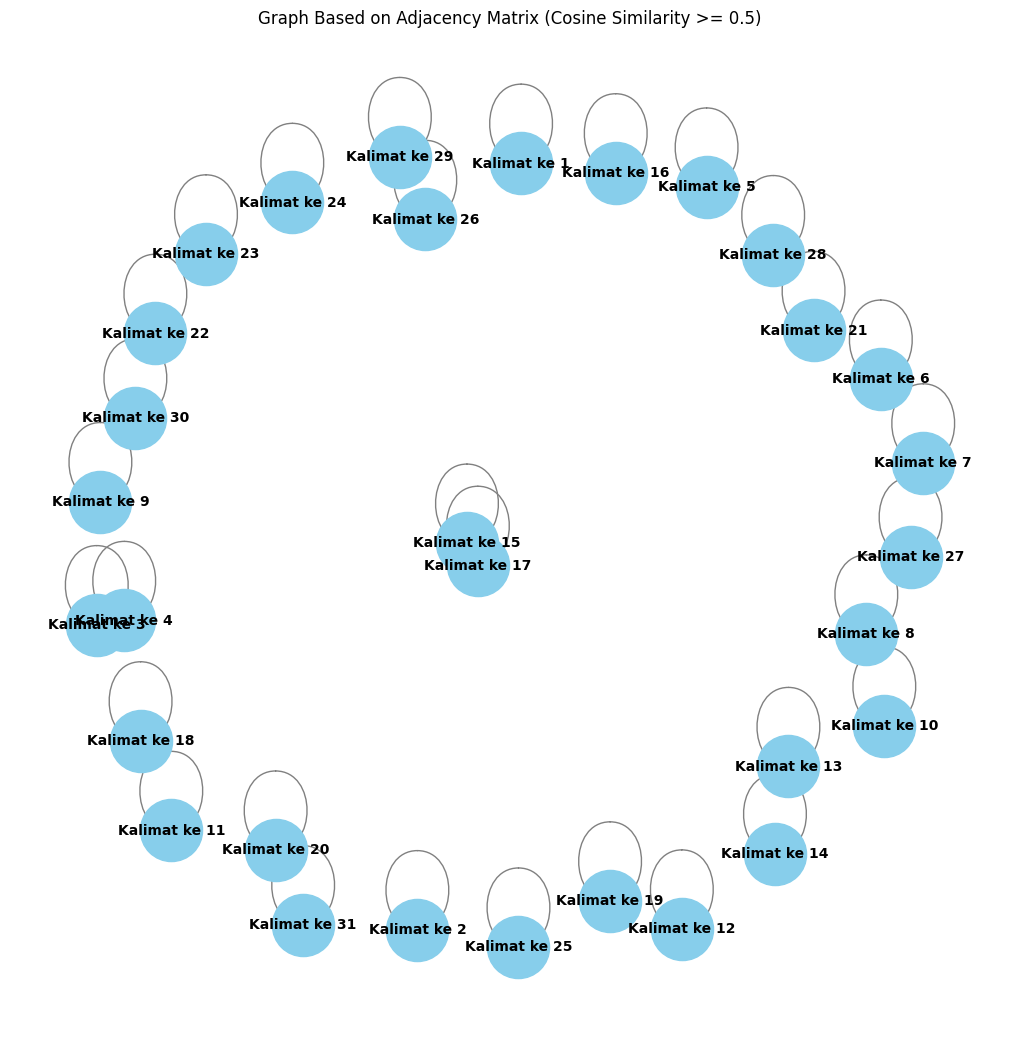

In [ ]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Atur layout graf
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix (Cosine Similarity >= 0.5)")
plt.show()

In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df


,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.0,0.066667,0.000000
1,Kalimat ke 2,0.0,0.066667,0.000000
2,Kalimat ke 3,0.0,0.100000,0.033333
3,Kalimat ke 4,0.0,0.100000,0.033333
4,Kalimat ke 5,0.0,0.066667,0.000000
5,Kalimat ke 6,0.0,0.066667,0.000000
6,Kalimat ke 7,0.0,0.066667,0.000000
7,Kalimat ke 8,0.0,0.066667,0.000000
8,Kalimat ke 9,0.0,0.066667,0.000000
9,Kalimat ke 10,0.0,0.066667,0.000000
